# Exploratory Data Analysis(EDA)

In [1]:
#Importing libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import cv2

In [2]:
data_dir = 'data' # data directory
#data_dir = data_dir.replace("\\","/")

# printing all the folders/files within the data directory
print(os.listdir(data_dir))

['labels.csv', 'Test data', 'Train_data']


In [3]:
import re

In [4]:
def get_file_path_df(folder):
    image_path = []
    for root, dirs, files in os.walk(folder):
        for f in files:
            if f.endswith(".jpg"): # checking for JPG extension 
                image_path.append(os.path.join(root, f)) # appending to image_path list
                # df = dataframe
        df_cols = {'path': image_path} # creating a dictionary
        df = pd.DataFrame(df_cols) # creating a dataframe
        #df1 = df.replace("/","\\")
    return df

In [5]:
# getting absolute path of all images and storing in a dataframe called data_df
data_df = get_file_path_df(data_dir)

# displying random 5 rows
data_df.head()

,path
0,data\Test data\1000.jpg
1,data\Test data\1001.jpg
2,data\Test data\1002.jpg
3,data\Test data\1003.jpg
4,data\Test data\1004.jpg


In [7]:
data_df.shape

(1230, 1)

def get_train_test_df(data_frame):
    train_path = []
    train_label = []
    test_path = []

    for path in data_frame['path'].values:
        # splitting the path by '/' (eg: data/Train data/Positive data/G0027850.JPG) 
        path_split = path.split('/')
        data_type = path_split[1] # accessing folder name

    if data_type == 'Train data': 
        # train images
        train_path.append(path)
        train_label.append(path_split[2]) # appending label
    else:
        # test images
        test_path.append(path)
        
    # creating dictionary of train data
    train_dict = df_cols = {'path': train_path, 'label': train_label} 
    train_df = pd.DataFrame(train_dict) # creating train dataframe

    test_dict = {'path': test_path} # creating dictionary of test data
    test_df = pd.DataFrame(test_dict) # creating test dataframe
    return train_df, test_df

In [12]:
test_lst = os.listdir('E:\Program\Dataverse\data\Test data') # your directory path
number_files_test = len(test_lst)
print(number_files_test)

556


In [13]:
train_lst = os.listdir('E:\Program\Dataverse\data\Train data') # your directory path
number_files_train = len(train_lst)
print(number_files_train)

674


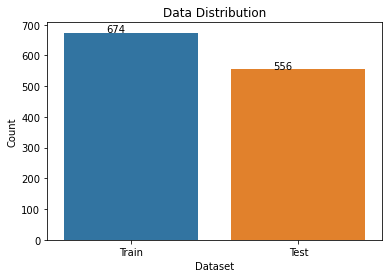

In [15]:
# visualization of data distribution among train and test

# creating a bar plot
plot = sns.barplot(['Train', 'Test'], 
                   [number_files_train, number_files_test])
plt.title('Data Distribution')
plt.xlabel('Dataset')
plt.ylabel('Count')

# adding class count to the barplot
for patch in plot.patches:
    # formatting and positioning the count values
    plot.annotate('{:n}'.format(patch.get_height()), 
                  (patch.get_x()+0.25, patch.get_height()+1)) 
plt.show()

In [16]:
def get_image_size_distrib(df):
    heights = []
    widths = []

    for path in df['path'].values:
        # img = cv2.imread(os.path.join(img_dir, path))
        img = cv2.imread(path) 
        shape = img.shape # (h, w, d) = image.shape
        heights.append(shape[0])
        widths.append(shape[1])

    plt.figure(figsize=(10,3))
    sns.distplot(heights)
    plt.title('Image height distribution')
    plt.xlabel('Height')
    plt.show()
    height_median = np.median(heights)
    print('Median height:', height_median)
    height_mean = np.mean(heights)
    print('Mean height:', height_mean)
    print()
    plt.figure(figsize=(10,3))
    sns.distplot(widths)
    plt.title('Image width distribution')
    plt.xlabel('Width')
    plt.show()
    width_median = np.median(widths)
    print('Median width:', width_median)
    width_mean = np.mean(widths)
    print('Mean width:', width_mean)

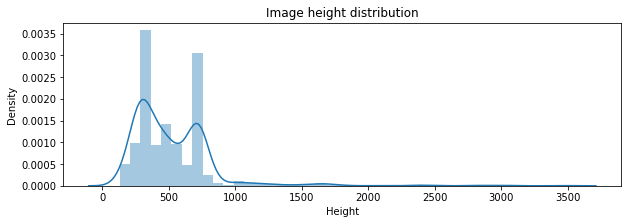

Median height: 450.0
Mean height: 520.490243902439



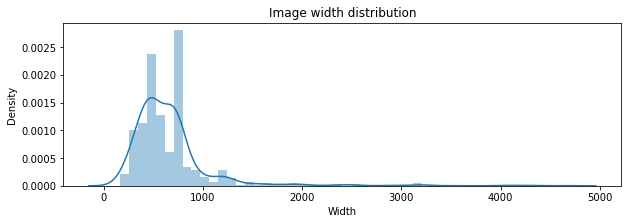

Median width: 560.5
Mean width: 663.5910569105691


In [17]:
get_image_size_distrib(data_df)

In [18]:
# annotation data (bounding boxes)

annotation_df = pd.read_csv(os.path.join(data_dir, 'labels.csv'))
annotation_df.head()

,ImageID,LabelName,XMin,XMax,YMin,YMax
0,1.jpg,pothole,0,131,140,263
1,1.jpg,pothole,168,487,279,449
2,1.jpg,pothole,1,144,34,109
3,2.jpg,pothole,57,952,271,505
4,3.jpg,pothole,225,416,292,439


In [21]:
def visualize_data(img_df, annot_df, data_type):
    rows = np.random.randint(img_df.shape[0], size=5) # generating 5 random numbers
    sample_imgs = img_df.iloc[rows, :] # random images

    counter = 0
    plt.figure(figsize = (12, 50))

    # checking if lowercase data_type = test
    if data_type.lower() == 'test':
        for idx, row in sample_imgs.iterrows():
            path = row['path'] # file path
            img = cv2.imread(path, cv2.IMREAD_UNCHANGED) # reading the image
            plt.subplot(5, 1, 1 + counter)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            counter += 1

    else:
        for idx, row in sample_imgs.iterrows():
            # file path
            path = row['path']  #(data/Train data/Positive data/G0027850.JPG
            img = cv2.imread(path, cv2.IMREAD_UNCHANGED) # reading the image
            lab = row['label'] # file label
            coords = [] # BBox coordinates
            # if the image contains potholes
            if lab == 'Positive data':
                lab = 'Pothole'
                img_id = path.split('/')[-1]
                img_id = img_id.split('.')[0]
                coords = annot_df[annot_df['image_id'] == img_id]
                coords = coords[['x', 'y', 'w', 'h']].values
            else:
                lab = 'No Pothole' 

        plt.subplot(5, 1, 1 + counter)
        plt.title(lab)
        plt.xticks([])
        plt.yticks([])
        # drawing BBoxes
        for c in coords:
            cv2.rectangle(img, (c[0], c[1]), (c[0]+c[2], 
                                              c[1]+c[3]), (255, 0, 0), 3)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

        counter += 1
    plt.show()

In [22]:
#visualizing train data
visualize_data(train_df, annotation_df, 'Train')

NameError: name 'train_df' is not defined